In [1]:
cd /Users/bastus/Desktop/Forschungsprojekt/genimpro

/Users/bastus/Desktop/Forschungsprojekt/genimpro


In [2]:
%run importwrapper.py
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [37]:
allPhenotypesDicts = []
sessionID = 3
        
for recordingID in genimpro.recordings.listRecodings(sessionID):
    recordingDetails = genimpro.recordings.getRecordingDetails(recordingID)
    
    for track in recordingDetails[4]:
        phenotypes = genimpro.recordings.getPhenotypesForTrack(track)
        if type(phenotypes) is list:
            allPhenotypesDicts.extend(phenotypes)

In [38]:
def convertToVector(phenotypeDict,printArray=0):
    vect = []
    for attribute in phenotypeDict:
        for value in phenotypeDict[attribute]:
            vect.append(phenotypeDict[attribute][value])
            if printArray:
                print attribute + " " + value + ": " + str(phenotypeDict[attribute][value])
    return vect

In [39]:
def flatten(x):
    result = []
    for el in x:
        if hasattr(el, "__iter__") and not isinstance(el, basestring):
            result.extend(flatten(el))
        else:
            result.append(el)
    return result

In [53]:
phenotypeArray = []
keylist = allPhenotypesDicts[0].keys()
keylist.sort()

[u'Chroma A', u'Chroma A#', u'Chroma B', u'Chroma C', u'Chroma C#', u'Chroma D', u'Chroma D#', u'Chroma E', u'Chroma F', u'Chroma F#', u'Chroma G', u'Chroma G#', u'Density', u'DynamicComplexity', u'Loudness', u'Loudness corrcoef', u'Loudness variance', u'Rhythm', u'Roughness', u'Roughness corrcoef', u'Roughness variance', u'SpectralCentroid', u'SpectralCentroid corrcoef', u'SpectralCentroid variance', u'SpectralComplexity', u'SpectralComplexity corrcoef', u'SpectralComplexity variance', u'ZCR', u'ZCR corrcoef', u'ZCR variance']


In [55]:
for phenotypeDict in allPhenotypesDicts:
    sortedDict = []
    for key in keylist:
        sortedDict.append(phenotypeDict[key])
    #phenotypeArray.append(flatten(phenotypeDict.values()))
    phenotypeArray.append(sortedDict)

In [56]:
#allPhenotypesVect = np.asarray(map(flatten,allPhenotypes))
allPhenotypesVect = np.asarray(phenotypeArray)

In [59]:
allPhenotypesVect[0]

array([  7.95680135e-02,   2.43667811e-01,   1.36757404e-01,
         3.10569972e-01,   2.15294793e-01,   3.84201676e-01,
         2.11296618e-01,   3.71655107e-01,   1.00000000e+00,
         3.52864027e-01,   1.09644823e-01,   4.12395447e-01,
         9.40462024e-01,   1.24455786e-01,   2.81854915e-02,
         1.49881823e-01,   4.97175952e-04,   7.53791428e-01,
         5.50568104e-01,  -3.88116164e-02,   9.77454191e-01,
         2.58442521e-01,  -4.75810269e-01,   4.76178796e-04,
         0.00000000e+00,  -1.99200823e-01,   1.59005532e-01,
         2.46093750e-01,  -3.04329689e-02,   1.78701467e-03])

In [60]:
where_are_NaNs = np.isnan(allPhenotypesVect)
allPhenotypesVect[where_are_NaNs] = 0

In [106]:
dataByDimension = []

for dimension in range(0,len(allPhenotypesVect[0]-1)):
#for dimension in range(0,6):
    dataByDimension.append([allPhenotypesVect[i][dimension] for i in range(0,len(allPhenotypesVect)-1)])

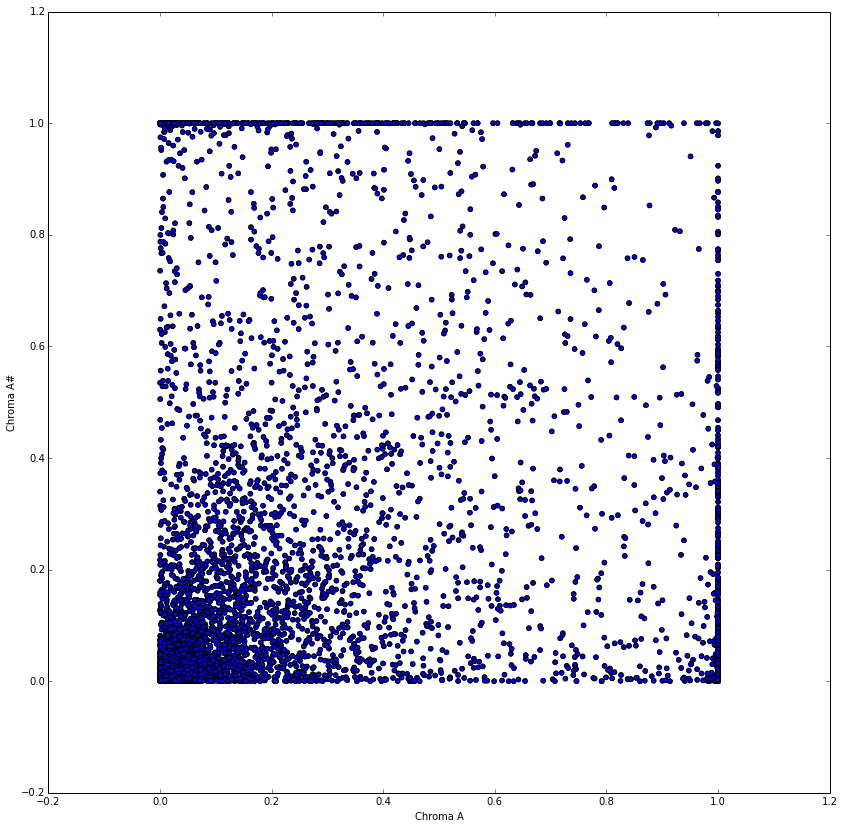

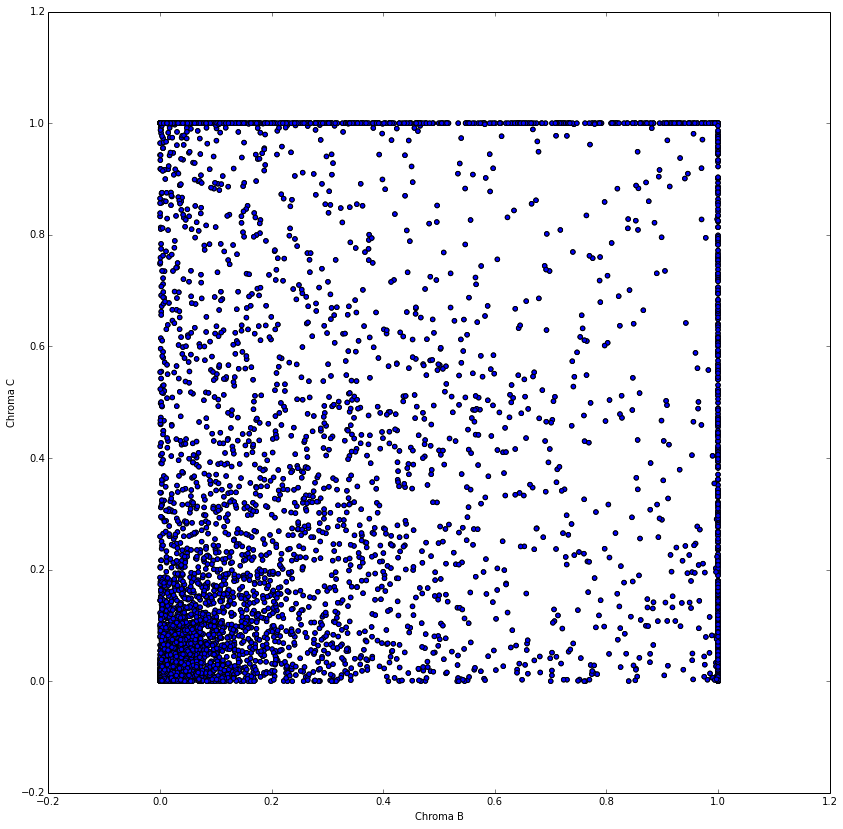

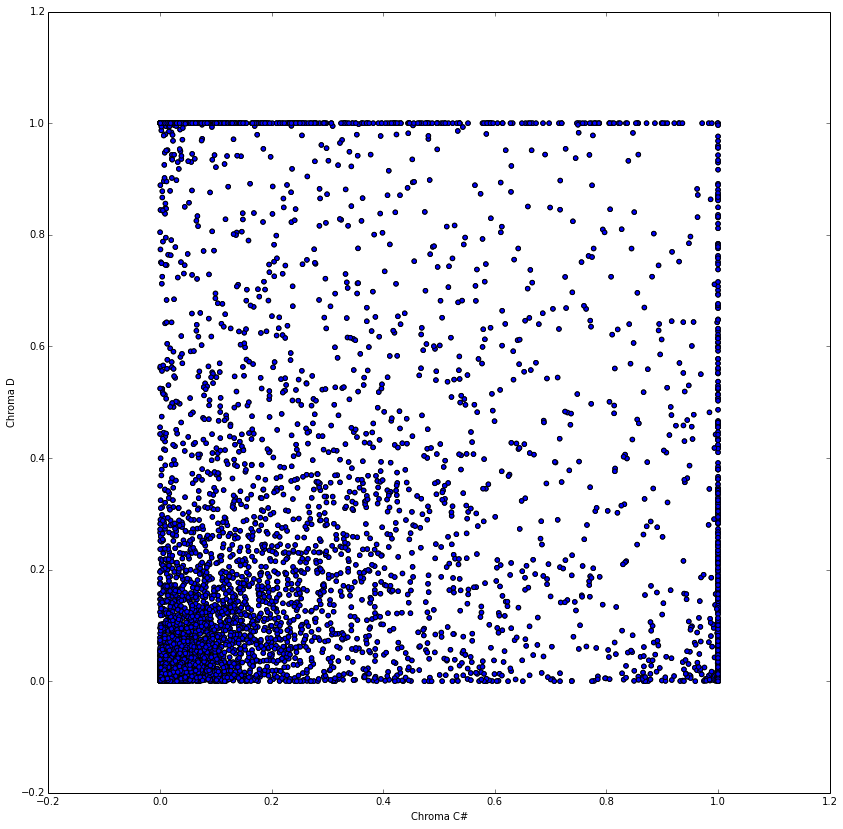

In [102]:

for i in range(0,len(dataByDimension)-1,2):
    fig = plt.figure(figsize=(14,14))
    ax = fig.add_subplot(111)
    ax.scatter(dataByDimension[i],dataByDimension[i+1])
    ax.set_xlabel(keylist[i])
    ax.set_ylabel(keylist[i+1])
    plt.show()

In [63]:
import skfuzzy as fuzz

colors = ['b', 'orange', 'g', 'r', 'c', 'm', 'y', 'k', 'Brown', 'ForestGreen']


In [107]:
alldata = np.vstack((dataByDimension))
alldata

array([[  7.95680135e-02,   2.79484279e-02,   0.00000000e+00, ...,
          9.89721954e-01,   2.11376511e-02,   1.62623793e-01],
       [  2.43667811e-01,   1.30466474e-02,   0.00000000e+00, ...,
          3.02970950e-02,   7.97573943e-03,   1.77514330e-02],
       [  1.36757404e-01,   1.12629589e-02,   0.00000000e+00, ...,
          6.51306331e-01,   2.19429750e-02,   5.38797602e-02],
       ..., 
       [  2.46093750e-01,   2.46093750e-01,   2.14843750e-01, ...,
          1.95312500e-02,   1.56250000e-02,   1.56250000e-02],
       [ -3.04329689e-02,  -8.75769411e-02,   3.01167775e-01, ...,
         -7.13005583e-02,  -3.10395913e-01,  -9.48783707e-02],
       [  1.78701467e-03,   6.93218437e-04,   2.60918057e-03, ...,
          1.70774295e-04,   7.58444384e-05,   3.37387542e-05]])

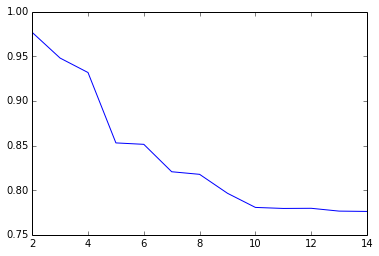

In [138]:
import skfuzzy as fuzz
from mpl_toolkits.mplot3d import Axes3D

k_fpc = []
centers = range(2,15)

for ncenters in centers:
    cntr, u_orig, d, _, _, p, fpc = fuzz.cluster.cmeans(alldata, ncenters, 1.1, error=0.005, maxiter=1000)
    
    cluster_membership = np.argmax(u_orig, axis=0) 
    #print p, fpc
    k_fpc.append(fpc)
    
    #fig = plt.figure(figsize=(30, 30), dpi=300)
    #ax = fig.add_subplot(111, projection='3d')
                         
    #for j in range(ncenters):
    #    ax.scatter(alldata[0, u_orig.argmax(axis=0) == j],
    #             alldata[1, u_orig.argmax(axis=0) == j], 
    #             alldata[2, u_orig.argmax(axis=0) == j], 
    #             'o',
    #             c=colors[j],
    #             label='series ' + str(j))
    #plt.show()
    
plt.plot(centers,k_fpc)

In [139]:
def genomeForSession(sessionID,nGenes=10):
    
    allPhenotypesDicts = []
    
    for recordingID in genimpro.recordings.listRecodings(sessionID):
        recordingDetails = genimpro.recordings.getRecordingDetails(recordingID)
    
    for track in recordingDetails[4]:
        phenotypes = genimpro.recordings.getPhenotypesForTrack(track)
        if type(phenotypes) is list:
            allPhenotypesDicts.extend(phenotypes)
            
    phenotypeArray = []
    keylist = allPhenotypesDicts[0].keys()
    keylist.sort()
    
    for phenotypeDict in allPhenotypesDicts:
        sortedDict = []
        for key in keylist:
            sortedDict.append(phenotypeDict[key])
        phenotypeArray.append(sortedDict)
        
    allPhenotypesVect = np.asarray(phenotypeArray)
    
    where_are_NaNs = isnan(allPhenotypesVect)
    allPhenotypesVect[where_are_NaNs] = 0

    dataByDimension = []

    for dimension in range(0,len(allPhenotypesVect[0]-1)):
        dataByDimension.append([allPhenotypesVect[i][dimension] for i in range(0,len(allPhenotypesVect)-1)])

    alldata = np.vstack((dataByDimension))
        
    cntr, u_orig, d, _, _, p, fpc = fuzz.cluster.cmeans(alldata, nGenes, 1.1, error=0.005, maxiter=1000)
    [u_orig[i][0] for i in range(len(d))]
    
    import sqlite3 as lite
    import json

    db = lite.connect('genImpro.db')
    c = db.cursor()

    genome = json.dumps(cntr.tolist())

    sqlcommand = "INSERT INTO genome (CNTR,sessionID) values (%s,%i)" % (repr(genome),sessionID)
    c.execute(sqlcommand)
    db.commit()

In [140]:
genomeForSession(sessionID)

In [141]:
np.vstack((allPhenotypesVect[0]))

array([[  7.95680135e-02],
       [  2.43667811e-01],
       [  1.36757404e-01],
       [  3.10569972e-01],
       [  2.15294793e-01],
       [  3.84201676e-01],
       [  2.11296618e-01],
       [  3.71655107e-01],
       [  1.00000000e+00],
       [  3.52864027e-01],
       [  1.09644823e-01],
       [  4.12395447e-01],
       [  9.40462024e-01],
       [  1.24455786e-01],
       [  2.81854915e-02],
       [  1.49881823e-01],
       [  4.97175952e-04],
       [  7.53791428e-01],
       [  5.50568104e-01],
       [ -3.88116164e-02],
       [  9.77454191e-01],
       [  2.58442521e-01],
       [ -4.75810269e-01],
       [  4.76178796e-04],
       [  0.00000000e+00],
       [ -1.99200823e-01],
       [  1.59005532e-01],
       [  2.46093750e-01],
       [ -3.04329689e-02],
       [  1.78701467e-03]])

In [149]:
u_predict, d, _, _, p, fpc = fuzz.cluster.cmeans_predict(np.vstack(allPhenotypesVect[0]), cntr, 3, error=0.005, maxiter=1000)

In [150]:
u_predict.flatten()

array([ 0.0790041 ,  0.08057308,  0.02568618,  0.03600923,  0.01606373,
        0.05539819,  0.10423932,  0.105435  ,  0.07956877,  0.06076088,
        0.08641681,  0.08228119,  0.10948749,  0.07907603])

In [133]:
import sqlite3 as lite
import json

db = lite.connect('genImpro.db')
c = db.cursor()

In [97]:
genome = json.dumps(cntr.tolist())

In [108]:
meta = c.execute("PRAGMA table_info('genome')")
for r in meta:
    print r

(0, u'ID', u'INTEGER', 1, None, 1)
(1, u'CNTR', u'TEXT', 0, None, 0)
(2, u'sessionID', u'INTEGER', 0, None, 0)


In [109]:
sqlcommand = "INSERT INTO genome (CNTR,sessionID) values (%s,%i)" % (repr(genome),sessionID)
c.execute(sqlcommand)
db.commit()

In [134]:
def getGenome(sessionID):
    sqlcommand = "SELECT CNTR FROM genome where sessionID=%i order by ID desc LIMIT 1 " % (sessionID)
    c.execute(sqlcommand)
    data = c.fetchone()

    return np.asarray(json.loads(data[0]))

In [144]:
newGenome = getGenome(sessionID)

In [145]:
u_predict, d, _, _, p, fpc = fuzz.cluster.cmeans_predict(np.vstack(allPhenotypesVect[0]), newGenome, 2, error=0.005, maxiter=1000)

In [146]:
u_predict

array([[ 0.11584402],
       [ 0.10101025],
       [ 0.11809936],
       [ 0.10288762],
       [ 0.07845   ],
       [ 0.08427627],
       [ 0.13135583],
       [ 0.10931993],
       [ 0.09311982],
       [ 0.06563691]])

In [160]:
def genotypeForSequence(phenotype,genome):
    where_are_NaNs = isnan(phenotype)
    phenotype[where_are_NaNs] = 0
    u_predict, d, _, _, p, fpc = fuzz.cluster.cmeans_predict(np.vstack(phenotype), genome, 2, error=0.005, maxiter=1000)
    return u_predict.flatten()

In [161]:
genotypeForSequence(allPhenotypesVect[0],newGenome)

array([ 0.11584402,  0.10101025,  0.11809936,  0.10288762,  0.07845   ,
        0.08427627,  0.13135583,  0.10931993,  0.09311982,  0.06563691])

In [26]:
recordingDetails = genimpro.recordings.getRecordingDetails(93)
phenotypes = genimpro.recordings.getPhenotypesForTrack(recordingDetails[4][0])

In [27]:
genotypes = genimpro.genotypesForSequences(phenotypes)

In [28]:
meta = c.execute("PRAGMA table_info('tracks')")
for r in meta:
    print r

(0, u'ID', u'INTEGER', 1, None, 1)
(1, u'recordingID', u'INTEGER', 0, None, 0)
(2, u'playerID', u'INTEGER', 0, None, 0)
(3, u'audiofile', u'TEXT', 0, None, 0)
(4, u'sonicevents', u'TEXT', 0, None, 0)


In [29]:
def getRecordingIDforTrack(track):
    sqlcommand = "SELECT recordingID FROM tracks where ID=%i" % (track[3])
    c.execute(sqlcommand)
    data = c.fetchone()
    return data[0]

In [30]:
recordingID = getRecordingIDforTrack(recordingDetails[4][0])
recordingDetails = genimpro.recordings.getRecordingDetails(recordingID)

In [31]:
recordingTracks = recordingDetails[4]
print recordingTracks

[[u'Marius Werner', u'snaredrum', u'1/f199ef77-778a-4fa5-9326-f377388687a8.aiff', 1, 93], [u'Felix Bratfisch', u'snaredrum', u'1/25a85c12-3e51-4aec-9e20-e4643d2dc31d.aiff', 2, 93]]


In [32]:
def getSequenceIDsForTrack(track):
    sqlcommand = "SELECT ID,start,end FROM sequences where trackID=%i" % (track[3])
    c.execute(sqlcommand)
    data = c.fetchall()

    if data is None:
        return None

    sequences = []
    
    for sequence in data:
        sequence = list(sequence)
        sequence.append(track[3])
        sequences.append(sequence)
        
    return sequences

In [33]:
sequenceData = getSequenceIDsForTrack(recordingDetails[4][0])
print sequenceData

[[11459, 510928, 633320, 1], [11460, 633320, 674320, 1], [11461, 674320, 726948, 1], [11462, 726948, 843328, 1], [11463, 843328, 932812, 1], [11464, 932812, 1010644, 1], [11465, 1010644, 1154104, 1], [11466, 1154104, 1207900, 1], [11467, 1207900, 1257608, 1], [11468, 1257608, 1297372, 1], [11469, 1297372, 1438696, 1], [11470, 1438696, 1512872, 1], [11471, 1512872, 1597916, 1], [11472, 1597916, 1629652, 1], [11473, 1629652, 1682348, 1], [11474, 1682348, 1725060, 1], [11475, 1725060, 1871380, 1], [11476, 1871380, 1924616, 1], [11477, 1924616, 1988680, 1], [11478, 1988680, 2037212, 1], [11479, 2037212, 2075116, 1], [11480, 2075116, 2150756, 1], [11481, 2150756, 2214596, 1], [11482, 2214596, 2233312, 1], [11483, 2233312, 2260496, 1], [11484, 2260496, 2319364, 1], [11485, 2319364, 2338756, 1], [11486, 2338756, 2378620, 1], [11487, 2378620, 2397128, 1], [11488, 2397128, 2536896, 1], [11489, 2536896, 2580868, 1], [11490, 2580868, 2711960, 1], [11491, 2711960, 2748324, 1], [11492, 2748324, 283

In [34]:
def prepareDataForRelations(trackID):
    recordingID = getRecordingIDforTrack(track)
    recordingDetails = genimpro.recordings.getRecordingDetails(recordingID)
    recordingTracks = recordingDetails[4]
    
    genotypes = []
    sequenceData = []
    
    for track in recordingTracks:
        genotypes.extend(genimpro.recordings.getGenotypesForTrack(track))
        sequenceData.extend(getSequenceIDsForTrack(track))
    
    return (genotypes,sequenceData)

In [35]:
(genotypes,sequenceData) = prepareDataForRelations(recordingDetails[4][0])

UnboundLocalError: local variable 'track' referenced before assignment

In [ ]:
len(genimpro.recordings.getGenotypesForTrack(recordingDetails[4][0]))

In [ ]:
from scipy.spatial import distance

def calculateRelationsForGenotypes(genotypes,sequenceData,t_fitness=0.2,n_relations=10):
    matrix = distance.cdist(genotypes, genotypes, 'euclidean')
    matrix = matrix/np.amax(matrix)
    
    relations = []
    
    for i in range(len(genotypes)):
        relation = {}
        
        sorted_distances_indices = np.argsort(matrix[i])
        relation["children"] = []
        relation["parents"] = []
        
        for n in range(1,len([x for x in matrix[i] if x<t_fitness])):
            sequenceIndex = sorted_distances_indices[n]

            if sequenceData[i][2] < sequenceData[sequenceIndex][1]:
                relation["children"].append([sequenceData[sequenceIndex][0],1-matrix[i][sequenceIndex]])
            else:
                relation["parents"].append([sequenceData[sequenceIndex][0],1-matrix[i][sequenceIndex]])

        relation["fitness"] = len(relation["children"])

        relations.append(relation)
    
    return relations
    

In [ ]:
relations = calculateRelationsForGenotypes(genotypes,sequenceData)

In [ ]:
relations

In [ ]:
[phenotypes[i].update(relations[i]) for i in range(len(phenotypes))]